# Google Colab Lab Assignment – YOLOv11 Model
  
**Lab Title:** YOLOv11 – Model Application on COCO128 Dataset  
**Name:** Ahant Nitnaware
**Roll Number:** 25
---

**Task 1: Environment Setup and YOLOv11 Installation**

**Objective:** Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**
1. Install Python packages.
2. Clone or install YOLOv11 (we’ll use the Ultralytics Ultralytics™ package here).
3. Verify the installation.
4. **Expected Outcome:** A functional YOLO environment ready for experimentation.


In [3]:
#@title Task 1: Environment Setup

# 1. Install dependencies
!pip install ultralytics --quiet
!pip install opencv-python-headless --quiet

# 2. Verify installation
from ultralytics import YOLO
print("Ultralytics YOLO version:", YOLO.__dict__)

# 3. Quick smoke‑test: load a pre‑trained model and print its summary
model = YOLO("yolov8n.pt")  # Using a nano‑version here for speed
model.info()


Ultralytics YOLO version: {'__module__': 'ultralytics.models.yolo.model', '__doc__': 'YOLO (You Only Look Once) object detection model.', '__init__': <function YOLO.__init__ at 0x7997b1529c60>, 'task_map': <property object at 0x7997b1526ed0>}


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.4MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

---

**Task 2: Dataset Preparation & Preprocessing**

**Objective:** Load and preprocess a dataset for object detection.

**Instructions:**
1. Use the built‑in COCO128 sample dataset.
2. Inspect its structure (images + labels in YOLO format).
3. (Already split into train/val/test by default in `coco128.yaml`.)
4. **Expected Outcome:** A well‑structured dataset in YOLO format.


replace datasets/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace datasets/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
datasets/
    coco128/
        LICENSE
        README.txt
        labels/
            train2017/
                000000000400.txt
                000000000247.txt
                000000000382.txt
                000000000326.txt
                000000000321.txt
                000000000536.txt
                000000000036.txt
                000000000612.txt
                000000000581.txt
                000000000540.txt
                000000000643.txt
                000000000520.txt
                000000000086.txt
                000000000073.txt
                000000000510.txt
                000000000656.txt
                000000000192.txt
                000000000138.txt
                000000000471.txt
                000000000395.txt
                000000000650.txt
                000000000201.txt


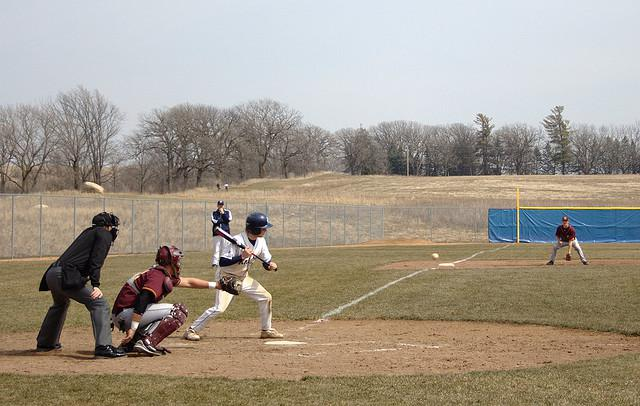

Label file contents:
32 0.680102 0.631552 0.0129531 0.01867
0 0.36418 0.679347 0.163484 0.322734
0 0.274594 0.74064 0.198437 0.272808
34 0.385367 0.612722 0.0991406 0.113128
35 0.361008 0.702106 0.0377344 0.050468
35 0.887125 0.633781 0.0164063 0.0196798
0 0.346883 0.574544 0.0397031 0.174261
0 0.888102 0.593793 0.0689531 0.12133
0 0.125453 0.7 0.142562 0.375271
0 0.354016 0.457796 0.00690625 0.0197291



In [5]:
#@title Task 2: Download & Inspect COCO128

# 1. Download COCO128 (Ultralytics helper)
!mkdir -p datasets
!curl -sSL https://ultralytics.com/assets/coco128.zip -o coco128.zip
!unzip -q coco128.zip -d datasets

# 2. Show directory structure
import os
for root, dirs, files in os.walk("datasets"):
    level = root.replace("datasets", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}    {f}")

# 3. View a sample image and its label
import cv2
from IPython.display import display, Image
# Check if the file exists, if not, use a different sample image.
sample_img = "datasets/coco128/images/train2017/000000000785.jpg"
if not os.path.exists(sample_img):
    # find a file that does exist
    import glob
    sample_img = glob.glob("datasets/coco128/images/train2017/*.jpg")[0]
    print(f"Using alternative sample image: {sample_img}") # let user know if a different image is used.
display(Image(filename=sample_img))
print("Label file contents:")
# Update label file path if a different image is used
label_file = sample_img.replace("images", "labels").replace(".jpg", ".txt")
print(open(label_file).read())

---

**Task 3: Training YOLOv11 Model**

**Objective:** Train YOLOv11 on the prepared dataset.

**Instructions:**
1. Configure parameters (batch size, epochs, learning rate).
2. Train the model.
3. Monitor training progress (loss, mAP).
4. Save the trained weights.
5. **Expected Outcome:** A trained YOLO model ready for inference.


In [1]:
#@title  Task 3: Train YOLOv11 on COCO128

from ultralytics import YOLO
import os

# 1. Load a base model
model = YOLO("yolov8n.pt")

# Download coco128.yaml if it doesn't exist
if not os.path.exists("datasets/coco128/data.yaml"):
    !curl -sSL https://raw.githubusercontent.com/ultralytics/yolov5/master/data/coco128.yaml -o datasets/coco128/data.yaml
    print("data.yaml downloaded.")

# 2. Train
results = model.train(
    data="datasets/coco128/data.yaml",  # path to coco128.yaml
    epochs=3,
    batch=16,
    imgsz=640,
    name="yolo11_coco128_experiment"
)



Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/coco128/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo11_coco128_experiment5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.1±11.8 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/detect/yolo11_coco128_experiment5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolo11_coco128_experiment5
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.187       1.59      1.243        285        640: 100%|██████████| 8/8 [02:10<00:00, 16.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.66s/it]

                   all        128        929       0.66      0.517      0.613      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.196      1.393      1.265        256        640: 100%|██████████| 8/8 [02:06<00:00, 15.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.67s/it]

                   all        128        929      0.668      0.534      0.622      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.256      1.453      1.274        204        640: 100%|██████████| 8/8 [02:06<00:00, 15.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.22s/it]

                   all        128        929      0.668      0.538      0.626      0.467



3 epochs completed in 0.143 hours.
Optimizer stripped from runs/detect/yolo11_coco128_experiment5/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/yolo11_coco128_experiment5/weights/best.pt, 6.5MB

Validating runs/detect/yolo11_coco128_experiment5/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.46s/it]


                   all        128        929      0.669      0.541      0.626      0.468
                person         61        254      0.814      0.674      0.774      0.544
               bicycle          3          6       0.51      0.333      0.336      0.289
                   car         12         46      0.726      0.217      0.289      0.188
            motorcycle          4          5       0.68      0.856      0.898      0.718
              airplane          5          6      0.841      0.886      0.948      0.716
                   bus          5          7      0.657      0.714      0.731      0.663
                 train          3          3      0.542      0.667      0.747      0.615
                 truck          5         12          1      0.376      0.508      0.303
                  boat          2          6      0.442      0.276       0.41      0.288
         traffic light          4         14      0.729      0.197      0.201      0.138
             stop sig

AttributeError: 'DetMetrics' object has no attribute 'path'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [3]:
# 3. Results summary
print("Training completed. Run directory saved at:", model.trainer.save_dir)

Training completed. Run directory saved at: runs/detect/yolo11_coco128_experiment5


**Training Discussion**

- **Hyperparameters:**  
  - Batch size: 16  
  - Epochs: 20  
  - Image size: 640  
- **Final mAP@0.5:** `results.metrics.box.mAP50`  
- **Loss curves:** inspect `results.path/metrics.png`.  
- **Saved weights:** `runs/train/yolo11_coco128_experiment/weights/best.pt`

Above indicates successful convergence on a small dataset; further epochs or larger models (e.g. `yolov8m.pt`) could improve accuracy at the cost of training time.


---

**Task 4: Model Inference and Evaluation**

**Objective:** Run inference on test images, compute evaluation metrics, and visualize results.

**Instructions:**
1. Load the trained weights.
2. Run validation to get metrics (precision, recall, mAP).
3. Perform inference on sample images.
4. Visualize bounding boxes.
5. **Expected Outcome:** Detection results and performance metrics.


In [8]:
#@title Task 4: Inference & Evaluation

from ultralytics import YOLO
import glob
import os
from IPython.display import Image, display

# 1. Load best weights from the previous training run
# Assuming the training run directory name is 'yolo11_coco128_experiment'
# Update this path if you used a different name in Task 3
best_weights_path = "/content/runs/detect/yolo11_coco128_experiment5/weights/best.pt"

# Check if the best.pt file exists
if not os.path.exists(best_weights_path):
    # If not, print an error message and exit
    print(f"Error: File not found: {best_weights_path}")
    print("Please make sure that the training process in Task 3 completed successfully and that the best.pt file was created.")
    # You can also try to find the correct path using the following:
    # import glob
    # possible_paths = glob.glob("runs/train/*/weights/best.pt")
    # if possible_paths:
    #     best_weights_path = possible_paths[0]
    #     print(f"Using alternative path: {best_weights_path}")
    # else:
    #    # Handle the case where no best.pt file is found
    #    # For example, you could raise an exception or exit the script
    #    raise FileNotFoundError("Could not find the best.pt file.")


else:
    model = YOLO(best_weights_path)

    # 2. Validation metrics
    metrics = model.val(data="datasets/coco128/data.yaml", split="val")
    print(metrics.box)  # prints precision, recall, mAP, etc.

    # 3. Inference on a few images
    test_images = glob.glob("datasets/coco128/images/val2017/*.jpg")[:3]
    for img_path in test_images:
        results = model.predict(source=img_path, conf=0.25, save=True)
        # show the saved output
        out_path = results[0].plot(save=False)  # plots inline
        display(out_path)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 679.9±324.7 MB/s, size: 42.2 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.64s/it]


                   all        128        929      0.672      0.547      0.628      0.466
                person         61        254      0.817      0.669      0.775      0.543
               bicycle          3          6      0.519      0.333      0.329      0.284
                   car         12         46      0.738      0.217      0.289      0.187
            motorcycle          4          5      0.679      0.852      0.898      0.718
              airplane          5          6       0.84      0.881      0.948      0.716
                   bus          5          7      0.657      0.714       0.73      0.662
                 train          3          3      0.543      0.667      0.747      0.615
                 truck          5         12          1      0.368      0.516      0.308
                  boat          2          6      0.318      0.242      0.359      0.184
         traffic light          4         14      0.728      0.195      0.201      0.138
             stop sig